In [1]:
#import libraries
import geopandas as gpd
import zipfile
import shapefile
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#unzip file
zipped = zipfile.ZipFile(r'C:\Manto\Personal\Norway map.zip', 'r')
zipped.extractall(r'C:\Manto\Personal\Norway_coordinates')
zipped.close()

In [3]:
# read data
df = gpd.read_file(r'C:\Manto\Personal\Norway_coordinates\Basisdata_0000_Norge_25833_Postnummeromrader_SOSI_Postnummerområde_FLATE.shp',encoding='cp1252')

In [4]:
# list columns to translate them and figure out whatit means in english
list(df)

['DATAUTTAKS',
 'KOMMUNENUM',
 'KVALITET  ',
 'LOKALID   ',
 'NAVNEROM  ',
 'OBJTYPE   ',
 'OPPDATERIN',
 'OPPHAV    ',
 'POSTNUMMER',
 'POSTSTED  ',
 'REF       ',
 'SOSI_ID   ',
 'TYPE      ',
 'VERSJONID ',
 'geometry']

In [5]:
#number of unique postal codes
len(set(df['POSTNUMMER']))

3273

In [6]:
#number of unique postal codes second method
len(df.POSTNUMMER.unique())

3273

In [11]:
# cast 'geometry' column to string so I can check and remove duplicates to make plotting more efficient 
df['geostring'] = df['geometry'].astype(str)

In [8]:
# number of unique postcodes with unique ereas
len(df.drop_duplicates(['geostring','POSTNUMMER']))

3351

In [9]:
#remove duplicates
df.drop_duplicates(['geostring','POSTNUMMER'],inplace=True)

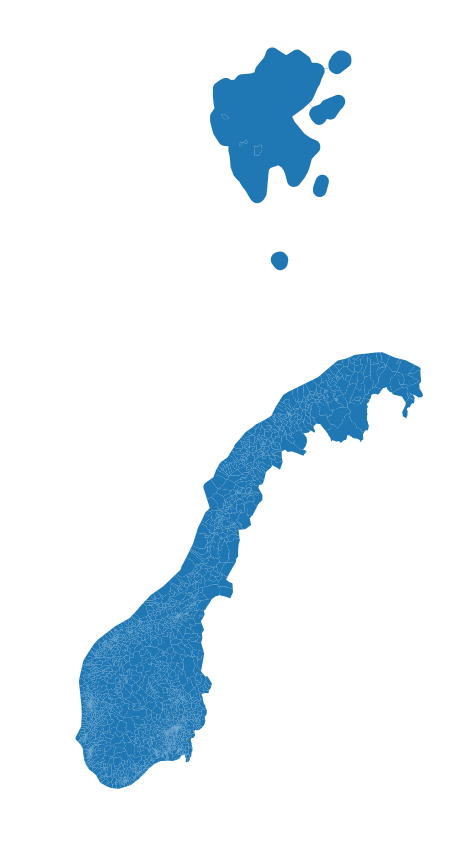

In [12]:
# plot and save map
df[['geometry','POSTNUMMER']].plot(figsize=(10,15)).axis('off')
plt.savefig(r'C:\Manto\Personal\Norway_coordinates\postalcodes_map.png',dpi=2000)

In [18]:
# some records had same postcode, but different post erea. These "POSTNUMMER" marked as 'Trie' in column 'duplicate'
df['duplicate'] = df.duplicated(subset='POSTNUMMER')
df[df['duplicate']==True]

,DATAUTTAKS,KOMMUNENUM,KVALITET,LOKALID,NAVNEROM,OBJTYPE,OPPDATERIN,OPPHAV,POSTNUMMER,POSTSTED,REF,SOSI_ID,TYPE,VERSJONID,geometry,geostring,duplicate
238,20180307102107,0301,55 1500,7a89e077-d7bf-40ac-8157-ea3049da38db,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0253,OSLO,:-64712 :-64713 :-68163 :1791 :-56156 :-56173,72727,FLATE,20180215,"POLYGON ((260929.97 6649678.52, 260984.86 6649...","POLYGON ((260929.97 6649678.52, 260984.86 6649...",True
277,20180307102107,0301,82,ea359aa7-f367-4165-9688-19095eb8f1f9,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0494,OSLO,:-56386 :2071 :-56387,72766,FLATE,20180215,"POLYGON ((264796.02 6654412.75, 264827.09 6654...","POLYGON ((264796.02 6654412.75, 264827.09 6654...",True
279,20180307102107,0301,82,b899a838-be9d-417c-8c04-375ecb029fb2,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0489,OSLO,:2076 :2074 :2023 :13707 :-56063 :-56449 :-560...,72768,FLATE,20180215,"POLYGON ((264109 6653968, 264183.83 6654184.97...","POLYGON ((264109 6653968, 264183.83 6654184.97...",True
295,20180307102107,0301,82,26dc08fb-2844-472b-95e0-9d8e670e0457,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0566,OSLO,:2195 :-56560,72784,FLATE,20180215,"POLYGON ((263815.38 6650833.45, 263825.23 6650...","POLYGON ((263815.38 6650833.45, 263825.23 6650...",True
296,20180307102107,0301,82,f191c083-1a31-4431-9204-422682ad9e2a,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0566,OSLO,:2197 :-56562,72785,FLATE,20180215,"POLYGON ((263677.53 6650959.48, 263691.07 6650...","POLYGON ((263677.53 6650959.48, 263691.07 6650...",True
302,20180307102107,0301,82,0c06b70f-186d-4470-93e2-8a49bd7ba8b7,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0555,OSLO,:2214 :-69547 :-69580 :-68515 :-56583 :-63010 ...,72791,FLATE,20180215,"POLYGON ((263014.69 6650875.21, 263016.39 6650...","POLYGON ((263014.69 6650875.21, 263016.39 6650...",True
304,20180307102107,0301,82,1fc707f4-01f2-487c-9095-8ca109c3043f,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0553,OSLO,:-51149 :69270 :68534 :32291 :56583 :68515 :51...,72793,FLATE,20180215,"POLYGON ((263169.03 6650679.42, 263155.56 6650...","POLYGON ((263169.03 6650679.42, 263155.56 6650...",True
311,20180307102107,0301,82,744350d6-4d15-43c3-a408-f3188f89cb99,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0959,OSLO,:2247 :2248 :-56615 :-67849,72800,FLATE,20180215,"POLYGON ((269841.08 6654645.62, 270070 6654606...","POLYGON ((269841.08 6654645.62, 270070 6654606...",True
322,20180307102107,0301,82,971d97b4-a520-43b6-8e7c-5d47ee9326de,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",1063,OSLO,:2306 :-56661 :-56671,72811,FLATE,20180215,"POLYGON ((271401.55 6651728.68, 271521 6651715...","POLYGON ((271401.55 6651728.68, 271521 6651715...",True
337,20180307102107,0301,82,1686abb4-5ed3-4fac-a36a-2b7d5da25a4a,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",0661,OSLO,:69720 :-56080 :38616 :13244 :1091 :-38589 :85...,72826,FLATE,20180215,"POLYGON ((265514 6649330, 265646.33 6649441.35...","POLYGON ((265514 6649330, 265646.33 6649441.35...",True
